# Anomaly detection on the wine dataset


In [1]:
from sklearn.datasets import load_wine
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier

import matplotlib.pyplot as plt
import pandas as pd
import numpy as np

### Load data

In [2]:
X, y = load_wine(return_X_y= True)
print ('X.shape= ', X.shape)
print ('y.shape= ', y.shape)

X.shape=  (178, 13)
y.shape=  (178,)


In [3]:
dfx = pd.DataFrame(X, columns=["Alcohol", "Malic acid", "Ash", 
                               "Alcanity of ash", "Magnesium",
                               "Total phenols", "Flavanoids",
                               "Nonflavanoid phenols", "Proanthocyanins",
                               "Color intensity", "Hue", 
                               "OD280/OD315 of diluted wines", "Proline", ])
dfy = pd.DataFrame(y)
dfx

,Alcohol,Malic acid,Ash,Alcanity of ash,Magnesium,Total phenols,Flavanoids,Nonflavanoid phenols,Proanthocyanins,Color intensity,Hue,OD280/OD315 of diluted wines,Proline
0,14.23,1.71,2.43,15.6,127.0,2.80,3.06,0.28,2.29,5.64,1.04,3.92,1065.0
1,13.20,1.78,2.14,11.2,100.0,2.65,2.76,0.26,1.28,4.38,1.05,3.40,1050.0
2,13.16,2.36,2.67,18.6,101.0,2.80,3.24,0.30,2.81,5.68,1.03,3.17,1185.0
3,14.37,1.95,2.50,16.8,113.0,3.85,3.49,0.24,2.18,7.80,0.86,3.45,1480.0
4,13.24,2.59,2.87,21.0,118.0,2.80,2.69,0.39,1.82,4.32,1.04,2.93,735.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...
173,13.71,5.65,2.45,20.5,95.0,1.68,0.61,0.52,1.06,7.70,0.64,1.74,740.0
174,13.40,3.91,2.48,23.0,102.0,1.80,0.75,0.43,1.41,7.30,0.70,1.56,750.0
175,13.27,4.28,2.26,20.0,120.0,1.59,0.69,0.43,1.35,10.20,0.59,1.56,835.0
176,13.17,2.59,2.37,20.0,120.0,1.65,0.68,0.53,1.46,9.30,0.60,1.62,840.0


In [4]:
ash = dfx["Ash"]
malic = dfx["Malic acid"]

df2 = X[:, 0:2]


### Visualize data

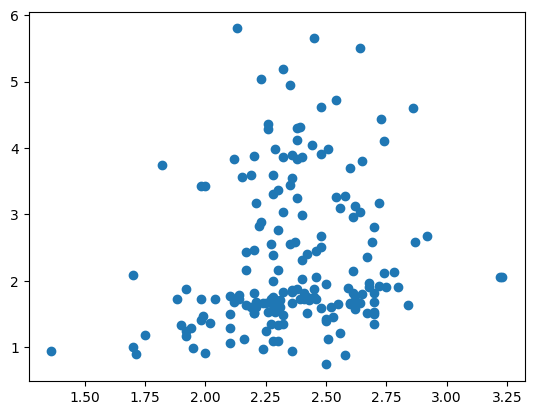

In [5]:
plt.figure()
plt.scatter(ash, malic)

### Eliptic Envelope 

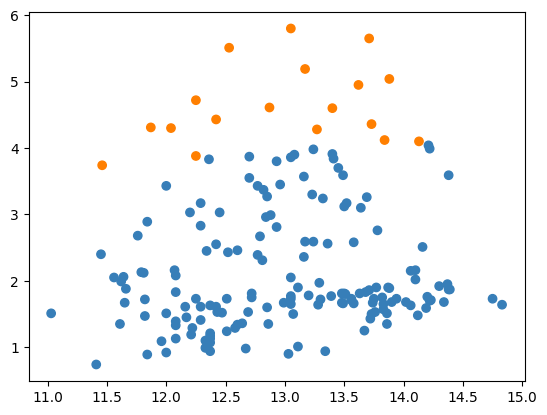

In [6]:
from sklearn.covariance import EllipticEnvelope

algorithm = EllipticEnvelope(random_state=2021).fit(df2)
y_pred = algorithm.predict(df2)

plt.figure()
colors = np.array(['#377eb8' , '#ff7f00'])
plt.scatter(df2[:, 0], df2[:, 1], color=colors[(y_pred - 1) // 2])

### DBSCAN

In [7]:
from sklearn.cluster import DBSCAN 

dbscan = DBSCAN(eps=0.6)
dbscan.fit(df2)
set(dbscan.labels_)

{-1, 0}

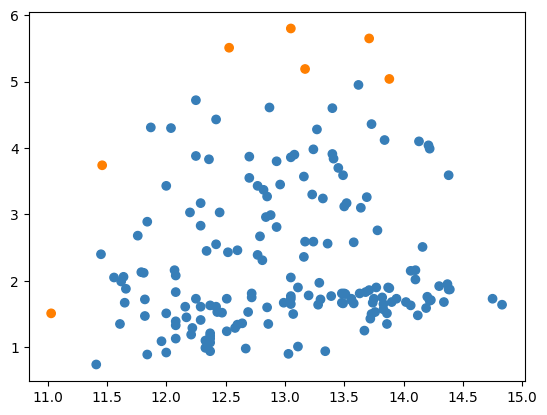

In [8]:
plt.figure()
outliers= np.where(dbscan.labels_== -1, 1, 0)
plt.scatter(df2[:, 0], df2[:, 1], color=colors[outliers])